In [1]:
!pip install numpy==1.19.5
!pip install pandas==1.1.5

!pip install sklearn==0.0
!pip install matplotlib==3.2.2
!pip install keras==2.7.0



In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import *
from keras . models import Sequential
from keras . layers import Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from tensorflow.keras.metrics import *

## FC Toy data

In [3]:
def split_data(u1,u2,sigma,num):
  X1 = sigma * np.random.randn(num,2)+u1 # Generating the first 125 xi that have label yi = −1.
  X2 = sigma * np.random.randn(num,2)+u2 # Generating the last 125 xi that have label yi = 1.
  X = np.concatenate((X1,X2),axis=0)
  y=np.full(num,-1)
  y=np.append(y,np.full(num,1))
  return train_test_split(X,y,test_size=0.2,random_state=42)

In [11]:
X_train,X_test,y_train,y_test = split_data(u1=[-1,0],u2=[1,0],sigma=0.75,num=125)

In [34]:
model=Sequential()
model.add(Dense(10, activation="relu", input_shape=(2,)))
model.add( Dense (5 , activation ='relu'))
model.add( Dense (2 , activation ='tanh'))
model . compile ( loss ="binary_crossentropy", optimizer ="adam", metrics =[ "accuracy"])
#print(model.summary())
model . fit (X_train , y_train, epochs =100 , batch_size =10,verbose=0)

In [28]:
#viewing the number of parameter to adjust in each layer
input_shape = X_train.shape  
model.build(input_shape) 
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 10)                30        
                                                                 
 dense_28 (Dense)            (None, 5)                 55        
                                                                 
 dense_29 (Dense)            (None, 2)                 12        
                                                                 
Total params: 97
Trainable params: 97
Non-trainable params: 0
_________________________________________________________________


In [35]:
loss,accuracy=model.evaluate(x=X_test,y=y_test,verbose=0)
print(accuracy)

0.3799999952316284


## Fully Connected Neural Network for the IRIS DataSet

### Generating Data and pretraitemnt 

In [ ]:
iris=load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
train_labels = to_categorical(y_train)
test_labels = to_categorical(y_test)

In [ ]:
iris_df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


We have 3 classes , 150 instances and 4 features in this dataset that are the following


1.   sepal length
2.   sepal width
3.   petal length
4.   petal width






### Training and evaluating the test dataset 

For our architecture, we used a fully connected network that contains 3 layers, the first two use RELU activation function and the last one use SoftMax activation function. For the optimizer, we decided to use the RMSProp with its default parameters

In [ ]:
network = Sequential()
network.add(Dense(512, input_shape=(4,), activation='relu', name='fc1'))
network.add(Dense(3, activation='softmax', name='output'))
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy',Precision(), Recall()])
history=network.fit(X_train, train_labels, epochs=150, batch_size=20,verbose=0,validation_data=(X_test, test_labels))
test_loss, test_acc,test_precision, test_recall = network.evaluate(X_test, test_labels)
print('Test Accuracy: ', test_acc, '\nTest Loss: ', test_loss,'\nTest precision',test_precision,'\nTest Recall',test_recall)

1/1 [==============================] - 0s 19ms/step - loss: 0.0593 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000
Test Accuracy:  1.0 
Test Loss:  0.059347964823246 
Test precision 1.0 
Test Recall 1.0



#### Interpretation
We have found an accurency of 96% which is a very intersting value. For further information, we have evaluated the precision and the recall. We found a value of 96% both.

Precision can be seen as a measure of **quality**, and recall as a measure of **quantity**. Higher precision means that an algorithm returns more relevant results than irrelevant ones, and high recall means that an algorithm returns most of the relevant results 

In [40]:
def plot_loss(history):
    plt.style.use("ggplot")
    plt.figure(figsize=(8, 4))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title("Model's loss")

    plt.xlabel("Epoch #")
    plt.ylabel("Loss")
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()


def plot_accuracy(history):
    plt.style.use("ggplot")
    plt.figure(figsize=(8, 4))
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title("Model's accuracy")
    plt.xlabel("Epoch #")
    plt.ylabel("Accuracy")
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

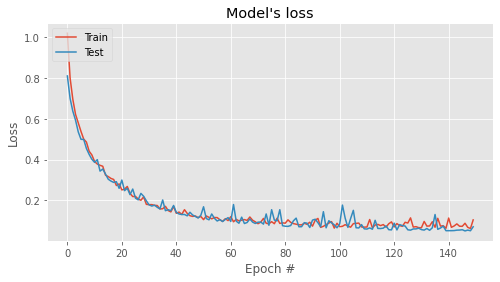

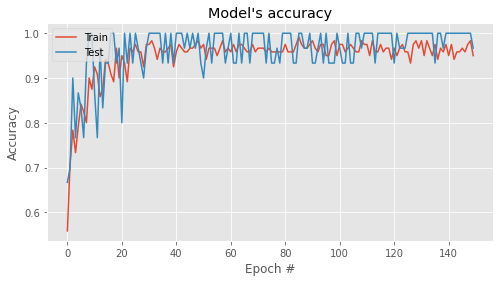

In [ ]:
plot_loss(history)
plot_accuracy(history)

The curves show that we have the model is able to learn our test set. Sure we found some fluctuations but in statistics point of view, the accurancy converge to 1. Graphically, we can say after 100 epochs, we reach some stabilisation in term of performance.

#### Modifying the hidden layer activation function
Another important note is that using different activations function doesn’t affect what our network can learn, only how fast (how many data/epochs it needs). 

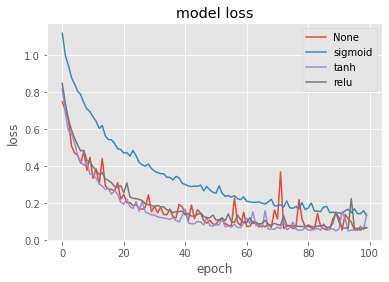

In [ ]:
for activation in [None, 'sigmoid', 'tanh', 'relu']:
  network = Sequential()
  network.add(Dense(512, input_shape=(4,), activation=activation, name='fc1'))
  network.add(Dense(3, activation='softmax', name='output'))
  network.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy',Precision(), Recall()])
  history=network.fit(X_train, train_labels, epochs=100, batch_size=20,verbose=0,validation_data=(X_test, test_labels))
  plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['None', 'sigmoid', 'tanh', 'relu'], loc='upper right')


#### Interpretation
As we see, the sigmoid activation function is the worst in term of loss. The other using tanh and relu, we found a result that is close and better then using nothing.

## Digit Dataset: towards to CNN
### Exploring the Dataset

In [37]:
digits=load_digits()
X = digits.data
y = digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
train_labels = to_categorical(y_train)
test_labels = to_categorical(y_test)
print('The number of the image is ',len(X),' and the number of pixel by image is ', len(X[1]))

The number of the image is  1797  and the number of pixel by image is  64


<Figure size 216x216 with 0 Axes>

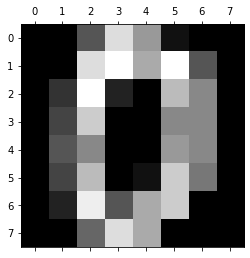

In [38]:
# Display the first digit
plt.figure(1, figsize=(3, 3))
plt.gray()
plt.matshow(digits.images[0])

We have a dataset composed of 1797 images (instance). each instance is an image of 64 pixels which represents 10 classes representing the numbers from 0 to 9.

### The model: training and testing

In [39]:
network = Sequential()
network.add(Dense(128, input_shape=(64,), activation='relu', name='fc1'))
network.add(Dense(10, activation='softmax', name='output'))
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy',Precision(), Recall()])
history=network.fit(X_train, train_labels, epochs=200, batch_size=20,verbose=0,validation_data=(X_test, test_labels))
test_loss, test_acc,test_precision, test_recall = network.evaluate(X_test, test_labels)
print('Test Accuracy: ', test_acc, '\nTest Loss: ', test_loss,'\nTest precision',test_precision,'\nTest Recall',test_recall)

12/12 [==============================] - 0s 2ms/step - loss: 0.1119 - accuracy: 0.9861 - precision_1: 0.9861 - recall_1: 0.9861
Test Accuracy:  0.9861111044883728 
Test Loss:  0.1118861511349678 
Test precision 0.9861111044883728 
Test Recall 0.9861111044883728


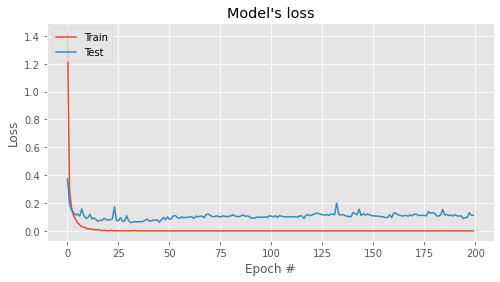

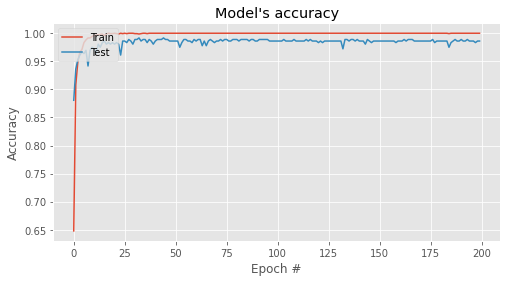

In [41]:
plot_loss(history)
plot_accuracy(history)

The curves show that we have the model is able to learn our test set. Sure we found some fluctuations but in statistics point of view, the accurancy converge to value of approximately 98 percent of of accuracy. Based on the precision and recall, we can judge that our model have highly prediction in term of performance.

Like we say previously, using different activations function doesn’t affect what our network can learn, only how fast. Let's discover.

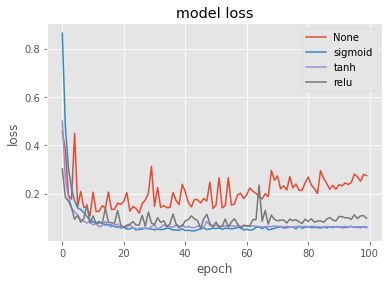

In [42]:
for activation in [None, 'sigmoid', 'tanh', 'relu']:
  network = Sequential()
  network.add(Dense(128, input_shape=(64,), activation=activation, name='fc1'))
  network.add(Dense(10, activation='softmax', name='output'))
  network.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy',Precision(), Recall()])
  history=network.fit(X_train, train_labels, epochs=100, batch_size=20,verbose=0,validation_data=(X_test, test_labels))
  plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['None', 'sigmoid', 'tanh', 'relu'], loc='upper right')

Without any other activation function, we obtain a very bad loss values. In this case, Relu present the most bad performance among the 3 suggest functions. Tanh and sigmoid have a very close behavior in term of loss.

## Face dataset

We would view a more real use case scenario, so we thought to use the olivetti face data.



In [43]:
faces=fetch_olivetti_faces()
X=faces.data
y=faces.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
train_labels = to_categorical(y_train)
test_labels = to_categorical(y_test)
print('The number of the image is ',len(X),' and the number of pixel by image is ', len(X[1]))
print('The number of classes', len(list( dict.fromkeys(y) )))

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data
The number of the image is  400  and the number of pixel by image is  4096
The number of classes 40


<Figure size 216x216 with 0 Axes>

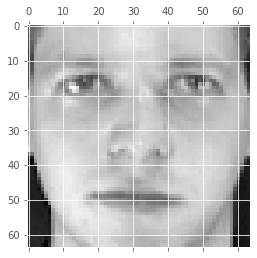

In [ ]:
# Display the first digit
plt.figure(1, figsize=(3, 3))
plt.gray()
plt.matshow(faces.images[0])

#### Bad model

In [49]:
network = Sequential()
network.add(Dense(128, input_shape=(4096,), activation='relu', name='fc1'))
network.add(Dense(128, input_shape=(4096,), activation='relu', name='fc2'))
network.add(Dense(40, activation='softmax', name='output'))
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy',Precision(), Recall()])
history=network.fit(X_train, train_labels, epochs=200, batch_size=20,verbose=0,validation_data=(X_test, test_labels))
test_loss, test_acc,test_precision, test_recall = network.evaluate(X_test, test_labels)
print('Test Accuracy: ', test_acc, '\nTest Loss: ', test_loss,'\nTest precision',test_precision,'\nTest Recall',test_recall)

3/3 [==============================] - 0s 6ms/step - loss: 2.7495 - accuracy: 0.1000 - precision_10: 0.5000 - recall_10: 0.0125    
Test Accuracy:  0.10000000149011612 
Test Loss:  2.7495334148406982 
Test precision 0.5 
Test Recall 0.012500000186264515


#### Better Model

In [56]:
network = Sequential()
network.add(Dense(1024, input_shape=(4096,), activation='relu', name='fc1'))
network.add(Dense(40, activation='softmax', name='output'))
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy',Precision(), Recall()])
history=network.fit(X_train, train_labels, epochs=200, batch_size=20,verbose=0,validation_data=(X_test, test_labels))
test_loss, test_acc,test_precision, test_recall = network.evaluate(X_test, test_labels)
print('Test Accuracy: ', test_acc, '\nTest Loss: ', test_loss,'\nTest precision',test_precision,'\nTest Recall',test_recall)

3/3 [==============================] - 0s 11ms/step - loss: 0.2761 - accuracy: 0.9375 - precision_13: 0.9375 - recall_13: 0.9375
Test Accuracy:  0.9375 
Test Loss:  0.2760985493659973 
Test precision 0.9375 
Test Recall 0.9375


In [57]:
input_shape = X_train.shape  
network.build(input_shape) 
network.summary()

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 fc1 (Dense)                 (None, 1024)              4195328   
                                                                 
 output (Dense)              (None, 40)                41000     
                                                                 
Total params: 4,236,328
Trainable params: 4,236,328
Non-trainable params: 0
_________________________________________________________________


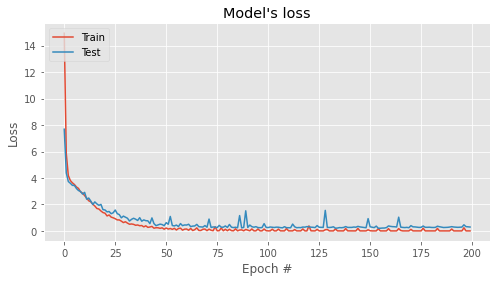

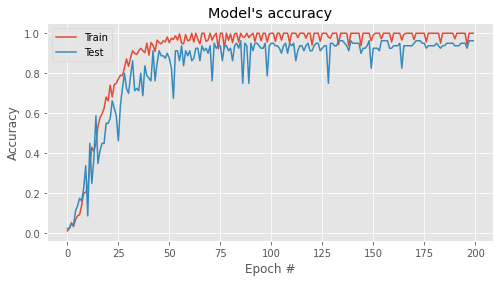

In [54]:
plot_loss(history)
plot_accuracy(history)

#### Interpretation

Based on the code used previously, we can see that to have better performance, we need to increase the number of neurone to have much better metrics. The second model used implies that the space and time complexity increase exponentially and we have an enourmous number of parameter for the gradient decent to adjust. So, the proposed model truely gave an impressive performance but it will lose in term of complexity, time and space. We should migrate to a more connected structure than the normal fully connected neural network.